In [58]:
import torch

# Assuming MATERIAL_LOOKUP and fen_to_binary_piece_positions are defined
MATERIAL_LOOKUP = {
    'r': '0001', 'n': '0010', 'b': '0011', 'q': '0100', 'k': '0101', 'p': '0110',
    'R': '0111', 'N': '1000', 'B': '1001', 'Q': '1010', 'K': '1011', 'P': '1100',
    '.': '0000'  # Using '.' to represent empty squares
}

def fen_to_binary_piece_positions(fen):
    piece_positions = fen.split()[0]
    binary_piece_positions = ''
    for char in piece_positions:
        if char.isdigit():
            binary_piece_positions += MATERIAL_LOOKUP['.'] * int(char)
        elif char in MATERIAL_LOOKUP:
            binary_piece_positions += MATERIAL_LOOKUP[char]
        else:  # Ignore slashes
            continue
    return binary_piece_positions

def fen_to_binary(fen):
    # Convert piece positions to binary
    binary_piece_positions = fen_to_binary_piece_positions(fen)
    
    # Extract additional game state information from FEN
    parts = fen.split()
    active_color = '0' if parts[1] == 'w' else '1'
    castling = parts[2]
    castling_binary = ''.join(['1' if char in castling else '0' for char in 'KQkq'])
    
    # Encode en passant target square
    en_passant = parts[3]
    if en_passant == '-':
        en_passant_binary = '00000000'
    else:
        en_passant_binary = '0' * (ord(en_passant[0]) - ord('a')) + '1' + '0' * (7 - (ord(en_passant[0]) - ord('a')))
    
    # Encode halfmove and fullmove numbers
    halfmove_clock = format(int(parts[4]), '08b')
    fullmove_number = format(int(parts[5]), '08b')
    
    # Combine all parts into a single binary string
    binary_representation = binary_piece_positions + active_color + castling_binary + en_passant_binary + halfmove_clock + fullmove_number
    
    # Convert binary string to a tensor
    binary_tensor = torch.tensor([int(bit) for bit in binary_representation], dtype=torch.float32)
    
    return binary_tensor

# Example FEN string
fen = "rnbqkbnr/pppppppp/8/8/3P4/8/PPP1PPPP/RNBQKBNR w KQkq - 0 1"
binary_tensor = fen_to_binary(fen)
print(binary_tensor)

tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1.,
        1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 

In [38]:
import chess
b = chess.Board('rn1k1b1r/pp1b1ppp/2p5/3pPq1n/3P1p2/2NB1N2/PPPB2PP/R2Q1K1R b - - 7 15')
print(b)

r n . k . b . r
p p . b . p p p
. . p . . . . .
. . . p P q . n
. . . P . p . .
. . N B . N . .
P P P B . . P P
R . . Q . K . R


In [59]:
print(fen_to_binary('rn1k1b1r/pp1b1ppp/2p5/3pPq1n/3P1p2/2NB1N2/PPPB2PP/R2Q1K1R b - - 7 15'))

tensor([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 1., 1., 0., 0., 

In [54]:
from peewee import *
import base64

db = SqliteDatabase("test.db")

class Evaluations(Model):
  id = IntegerField()
  fen = TextField()
  binary = BlobField()
  eval = FloatField()
  

  class Meta:
    database = db

  def return_custom_binary(self):
    return(fen_to_binary(self.fen))

  def binary_base64(self):
    print(f'fen {self.fen} eval {self.eval} binary {self.binary}')
    return base64.b64encode(self.binary)
db.connect()
LABEL_COUNT = 37164639
print(LABEL_COUNT)
eval = Evaluations.get(Evaluations.id == 4)
print(eval.binary_base64())
print(eval.return_custom_binary())

37164639
fen rnbqkbnr/ppp2ppp/4p3/3p4/2PP4/8/PP2PPPP/RNBQKBNR w KQkq - 0 3 eval 0.09 binary b'\x08\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x81\x00\x00\x00\x00\x00\x00\x00$\x00\x00\x00\x00\x00\x00\x00B\x00\x00\x00\x00\x00\x00\x00\x00\xcf\x000\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00\x81\x00\x00\x00\x00\x00\x00\x00$\x00\x00\x00\x00\x00\x00\x00B\x00\x00\x00\x00\x10\x08\xe7\x00\x00\x00\x03\xff\x0f'
b'CAAAAAAAAAAQAAAAAAAAAIEAAAAAAAAAJAAAAAAAAABCAAAAAAAAAADPADAAAAAAAAAAAAAAAAgAAAAAAAAAEAAAAAAAAACBAAAAAAAAACQAAAAAAAAAQgAAAAAQCOcAAAAD/w8='
0001001000110100010100110010000101100110011000000000011001100110000000000000000001100000000000000000000000000110000000000000000000000000110011000000000000000000000000000000000000000000000000001100110000000000110011001100110001111000100110101011100110000111


In [55]:
import os
import torch
import numpy as np
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, IterableDataset, random_split
import pytorch_lightning as pl
from random import randrange


class EvaluationDataset(IterableDataset):
  def __init__(self, count):
    self.count = count
  def __iter__(self):
    return self
  def __next__(self):
    idx = randrange(self.count)
    return self[idx]
  def __len__(self):
    return self.count
  def __getitem__(self, idx):
    eval = Evaluations.get(Evaluations.id == idx+1)
    bin = np.frombuffer(eval.binary, dtype=np.uint8)
    bin = np.unpackbits(bin, axis=0).astype(np.single) 
    bin = eval.return_custom_binary()
    eval.eval = max(eval.eval, -15)
    eval.eval = min(eval.eval, 15)
    ev = np.array([eval.eval]).astype(np.single) 
    return {'binary':bin, 'eval':ev}    

dataset = EvaluationDataset(count=LABEL_COUNT)

In [ ]:
# Start tensorboard.
%reload_ext tensorboard
%tensorboard --logdir lightning_logs/

In [56]:
from pytorch_lightning.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',  # Replace 'val_loss' with your validation metric
    dirpath = 'lightning_logs/chessml',
    filename='{epoch}-{val_loss:.2f}',  # Save files as epoch number and validation loss
    every_n_epochs=1,  # Save every epoch
    mode='min',  # 'min' if the metric should decrease (e.g., loss), 'max' for accuracy
)


In [63]:
import time
from collections import OrderedDict
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger

torch.set_float32_matmul_precision("high")

class EvaluationModel(pl.LightningModule):
  def __init__(self,learning_rate=1e-3,batch_size=1024,layer_count=10):
    super().__init__()
    self.batch_size = batch_size
    self.learning_rate = learning_rate
    layers = []
    layers.append(("linear-0", nn.Linear(285, 808)))
    layers.append(("relu-0", nn.ReLU()))

    for i in range(1, layer_count - 1):
        layers.append((f"linear-{i}", nn.Linear(808, 808)))
        layers.append((f"relu-{i}", nn.ReLU()))

    layers.append((f"linear-{layer_count - 1}", nn.Linear(808, 1)))
    self.seq = nn.Sequential(OrderedDict(layers))

  def forward(self, x):
    return self.seq(x)

  def training_step(self, batch, batch_idx):
    x, y = batch['binary'], batch['eval']
    y_hat = self(x)
    loss = F.l1_loss(y_hat, y)
    self.log("train_loss", loss)
    return loss

  def configure_optimizers(self):
    return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

  def train_dataloader(self):
    dataset = EvaluationDataset(count=LABEL_COUNT)
    return DataLoader(dataset, batch_size=self.batch_size, num_workers=0, pin_memory=True)  # Adjust num_workers as per your CPU

configs = [
           {"layer_count": 4, "batch_size": 512},
          #  {"layer_count": 6, "batch_size": 1024},
           ]
for config in configs:
    version_name = f'{int(time.time())}-batch_size-{config["batch_size"]}-layer_count-{config["layer_count"]}'
    logger = TensorBoardLogger("lightning_logs", name="chessml", version=version_name)
    trainer = pl.Trainer(accelerator="auto", precision="16-mixed", max_epochs=1,  logger=logger, callbacks = [checkpoint_callback])
    model = EvaluationModel(layer_count=config["layer_count"], batch_size=config["batch_size"])
    # Uncomment and use the learning rate finder if needed.
    trainer.fit(model)
    # Remove break if iterating through multiple configs.
    break

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name | Type       | Params
------------------------------------
0 | seq  | Sequential | 1.5 M 
------------------------------------
1.5 M     Trainable params
0         Non-trainable params
1.5 M     Total params
6.157     Total estimated model params size (MB)


Epoch 0:   0%|          | 43/72588 [00:20<9:45:28,  2.07it/s, v_num=nt-4] 

c:\Users\hacke\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [17]:
print(EvaluationDataset(1).__getitem__(3))

{'binary': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.,

In [22]:
import time
from collections import OrderedDict
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger

configs = [
           {"layer_count": 4, "batch_size": 512},
          #  {"layer_count": 6, "batch_size": 1024},
           ]
for config in configs:
    version_name = f'{int(time.time())}-batch_size-{config["batch_size"]}-layer_count-{config["layer_count"]}'
    logger = TensorBoardLogger("lightning_logs", name="chessml", version=version_name)
    trainer = pl.Trainer(accelerator="auto", precision="16-mixed", max_epochs=1,  logger=logger, callbacks = [checkpoint_callback])
    model = EvaluationModel(layer_count=config["layer_count"], batch_size=config["batch_size"])
    # Uncomment and use the learning rate finder if needed.
    trainer.fit(model)
    # Remove break if iterating through multiple configs.
    break

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\hacke\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [23]:
checkpoint_path = 'lightning_logs/chessml/modeltest.ckpt'


# trainer.save_checkpoint(checkpoint_path)

In [24]:
checkpoint = torch.load(checkpoint_path)
print(checkpoint.keys())

dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'loops', 'callbacks', 'optimizer_states', 'lr_schedulers', 'MixedPrecision'])


In [25]:
model = EvaluationModel(layer_count=config["layer_count"], batch_size=config["batch_size"])
model.load_state_dict(checkpoint['state_dict'])
model.eval()

EvaluationModel(
  (seq): Sequential(
    (linear-0): Linear(in_features=808, out_features=808, bias=True)
    (relu-0): ReLU()
    (linear-1): Linear(in_features=808, out_features=808, bias=True)
    (relu-1): ReLU()
    (linear-2): Linear(in_features=808, out_features=808, bias=True)
    (relu-2): ReLU()
    (linear-3): Linear(in_features=808, out_features=1, bias=True)
  )
)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.

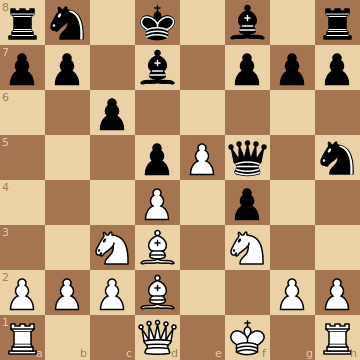

In [36]:
from IPython.display import display, SVG
from random import randrange

SVG_BASE_URL = "https://us-central1-spearsx.cloudfunctions.net/chesspic-fen-image/" 

def svg_url(fen):
  fen_board = fen.split()[0]
  return SVG_BASE_URL + fen_board

def show_index(idx):
  eval = Evaluations.select().where(Evaluations.id == idx+1).get()
  batch = dataset[idx]
  x, y = torch.tensor(batch['binary']), torch.tensor(batch['eval'])
  print(batch['binary'])
  y_hat = model(x)
  loss = F.l1_loss(y_hat, y)
  print(f'Idx {idx} Eval {y.data[0]:.2f} Prediction {y_hat.data[0]:.2f} Loss {loss:.2f}')
  print(f'FEN {eval.fen}')
  display(SVG(url=svg_url(eval.fen)))

for i in range(1):
  idx = randrange(LABEL_COUNT)
  show_index(idx)

# need to do better on "tactics" like 700756

In [ ]:
import torch
torch.cuda.is_available()